In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### How are we doing on renewable energy?
Data: https://openei.org/wiki/Map_of_Wind_Farms/Data <br>

In [2]:
wind_url = './result.csv'
wind = pd.read_csv('result.csv')

In [4]:
wind.head()

,Facility Name,Facility,FacilityType,Owner,Developer,EnergyPurchaser,Place,GeneratingCapacity,NumberOfUnits,CommercialOnlineDate,WindTurbineManufacturer,FacilityStatus,Coordinates
0,251 Wind,251 Wind,NaN,NaN,NaN,NaN,"Kern County, CA",18.43 MW,194.0,1987.0,Vestas,NaN,"35.0861°, -118.3533°"
1,3-D Metals,3-D Metals,Definition:Small Scale Wind,NaN,NaN,NaN,Valley City OH,0.1 MW,1.0,2009.0,Northern Power Systems,In Service,"41.2481°, -81.8831°"
2,30 MW Iowa DG Portfolio,30 MW Iowa DG Portfolio,NaN,NaN,NaN,NaN,"Story County, IA",30 MW,10.0,2017.0,Nordex,NaN,"42.0136°, -93.5181°"
3,6th Space Warning Squadron,6th Space Warning Squadron,NaN,NaN,NaN,NaN,"Barnstable County, MA",3.36 MW,2.0,2013.0,GE Wind,NaN,"41.7525°, -70.5417°"
4,AB Tehachapi Wind Farm,AB Tehachapi,Commercial Scale Wind,Coram Energy,AB Energy,Southern California Edison Co,"Tehachapi, California",6.97 MW,31.0,1992.0,Vestas,In Service,"35.0533°, -118.2686°"


In [5]:
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Data columns (total 13 columns):
Facility Name              1785 non-null object
Facility                   1784 non-null object
FacilityType               1210 non-null object
Owner                      1093 non-null object
Developer                  1084 non-null object
EnergyPurchaser            981 non-null object
Place                      1776 non-null object
GeneratingCapacity         1604 non-null object
NumberOfUnits              1767 non-null float64
CommercialOnlineDate       1649 non-null float64
WindTurbineManufacturer    1550 non-null object
FacilityStatus             1209 non-null object
Coordinates                1783 non-null object
dtypes: float64(2), object(11)
memory usage: 181.4+ KB


#### I want to plot energy generation, but it appears the data is a string. Looking at the data, I need to remove the units (MW or megawatts) to be able to plot this data. I ignore all other types of data, like NaNs.

In [7]:
wind['CapacityMW'] = wind.GeneratingCapacity.map(lambda x: x.strip('MW') if isinstance(x, str) else x)
wind['CapacityMW'] = wind.CapacityMW.map(float)

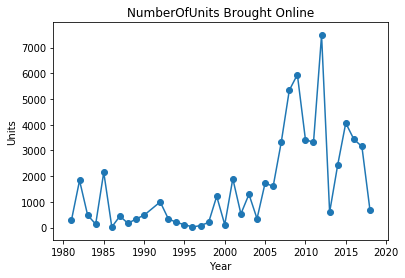

In [8]:
plt.plot(wind.groupby('CommercialOnlineDate').sum()['NumberOfUnits'].index,wind.groupby('CommercialOnlineDate').sum()['NumberOfUnits'])
plt.scatter(wind.groupby('CommercialOnlineDate').sum()['NumberOfUnits'].index,wind.groupby('CommercialOnlineDate').sum()['NumberOfUnits'])
plt.title('NumberOfUnits Brought Online')
plt.xlabel('Year')
plt.ylabel('Units')
plt.show()

Hm. That looks weird to me. There appear to be some discontinuities around 2009 (perhaps after effects of the recession?) and even more strangely, in 2013. <br>
Does this hold up in other variables, like energy capacity?

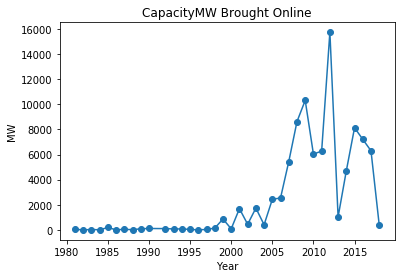

In [9]:
plt.scatter(wind.groupby('CommercialOnlineDate').sum()['CapacityMW'].index,wind.groupby('CommercialOnlineDate').sum()['CapacityMW'])
plt.plot(wind.groupby('CommercialOnlineDate').sum()['CapacityMW'].index,wind.groupby('CommercialOnlineDate').sum()['CapacityMW'])
plt.title('CapacityMW Brought Online')
plt.xlabel('Year')
plt.ylabel('MW')
plt.show()

Strange. I'd need to do some more digging.